In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/researchModel"

In [ ]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import apdn
import torch
%matplotlib inline

In [ ]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print gt.shape
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print 'generate density...'
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print 'done.'
    return density

In [ ]:
!ls

dataset.py		    part_B_test.json
image.py		    part_B_train.json
image.pyc		    part_B_train_with_val.json
main.ipynb		    part_B_val.json
make_dataset.ipynb	    README.md
make_model.ipynb	    ShanghaiTech_Crowd_Counting_Dataset.zip
model.py		    ShanghaiTech_Dataset
model.pyc		    train.py
part_A_test.json	    utils.py
part_A_train.json	    utils.pyc
part_A_train_with_val.json  val.ipynb
part_A_val.json


In [ ]:
#set the root to the Shanghai dataset you download
root = '/content/drive/My Drive/researchModel/ShanghaiTech_Dataset/'

Generate Ground Truth

In [ ]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

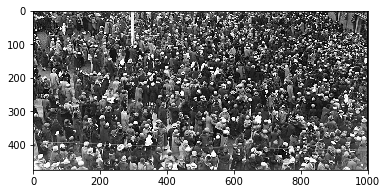

In [ ]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

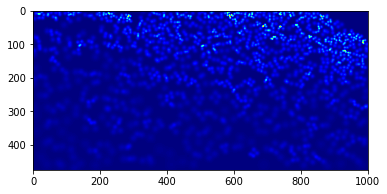

In [ ]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)# don't mind this slight variation

1225.8102

In [ ]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

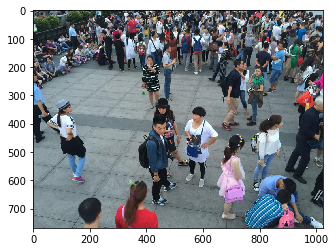

In [ ]:
plt.imshow(Image.open(img_paths[0]))

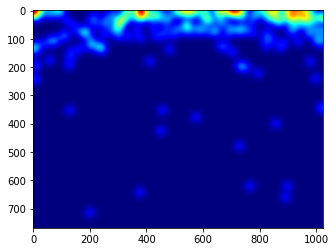

In [ ]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

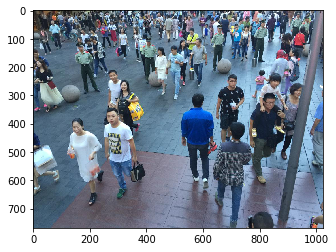

In [ ]:
plt.imshow(Image.open(img_paths[1]))

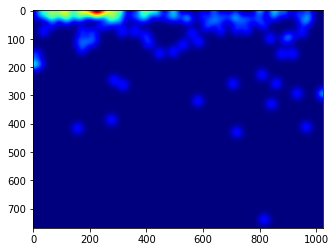

In [ ]:
gt_file = h5py.File(img_paths[1].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

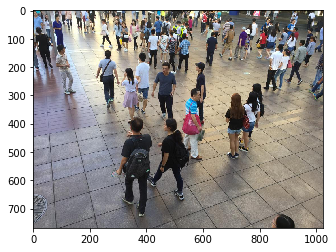

In [ ]:
plt.imshow(Image.open(img_paths[5]))

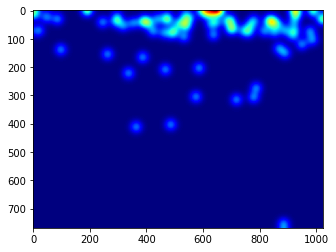

In [ ]:
gt_file = h5py.File(img_paths[5].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

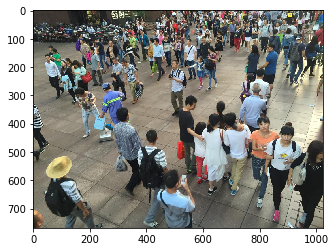

In [ ]:
plt.imshow(Image.open(img_paths[100]))

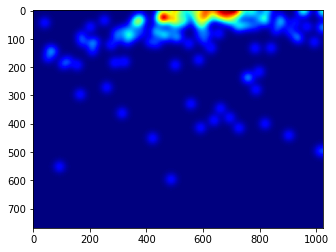

In [ ]:
gt_file = h5py.File(img_paths[100].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)# don't mind this slight variation

155.00000000000017

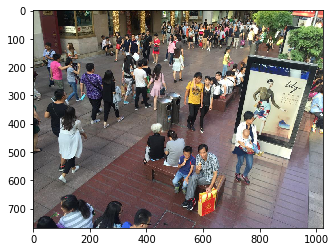

In [ ]:
plt.imshow(Image.open(img_paths[55]))

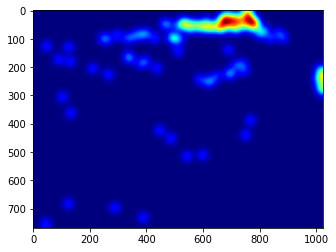

In [ ]:
gt_file = h5py.File(img_paths[55].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)# don't mind this slight variation

121.99999999999997

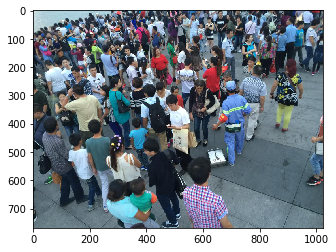

In [ ]:
plt.imshow(Image.open(img_paths[88]))

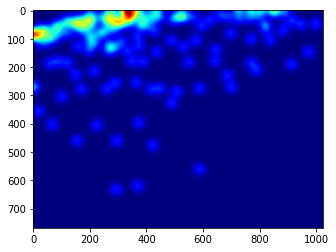

In [ ]:
gt_file = h5py.File(img_paths[88].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)

151.0

#Train images

In [ ]:
!python train.py part_A_train.json part_A_val.json 0 0

/usr/local/lib/python2.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
epoch 0, processed 0 samples, lr 0.0000001000
Epoch: [0][0/1200]	Time 0.695 (0.695)	Data 0.511 (0.511)	Loss 388.6634 (388.6634)	
Epoch: [0][30/1200]	Time 0.628 (0.560)	Data 0.520 (0.464)	Loss 82.2092 (584.0722)	
Epoch: [0][60/1200]	Time 0.591 (0.557)	Data 0.488 (0.458)	Loss 28.5827 (474.9877)	
Epoch: [0][90/1200]	Time 0.332 (0.539)	Data 0.301 (0.433)	Loss 52.5980 (470.9902)	
Epoch: [0][120/1200]	Time 0.477 (0.527)	Data 0.347 (0.416)	Loss 65.7747 (406.9293)	
Epoch: [0][150/1200]	Time 0.579 (0.507)	Data 0.452 (0.386)	Loss 41.9920 (428.9305)	
Epoch: [0][180/1200]	Time 0.297 (0.503)	Data 0.030 (0.373)	Loss 257.4123 (416.2252)	
Epoch: [0][210/1200]	Time 0.580 (0.499)	Data 0.459 (0.368)	Loss 260.1239 (386.5401)	
Epoch: [0][240/1200]	Time 0.369 (0.494)	Data 0.031 (0.362)	Loss 217.0728 (364.5820)